In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
text = "square"
x,y = np.ogrid[:300, :300]

In [11]:
#mask = (x - 150) ** 2 + (y - 150) ** 2 > 50 ** 2
#mask = 255 * mask.astype(int)

In [14]:
wc = WordCloud(background_color="white", repeat=True)
wc.generate(text)

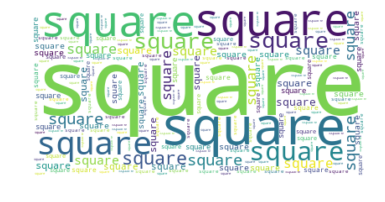

In [15]:
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [16]:
text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

In [17]:
wordcloud = WordCloud(width=480, height=320)
wordcloud.generate(text)

In [18]:
img = wordcloud.to_array()

In [19]:
wordcloud.to_file('wordcloudsample.png')

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import MeCab as mc

In [46]:
def mecab_analysis(text):
    t = mc.Tagger('-Ochasen')
    t.parse("")
    #enc_text = text.encode('utf-8') 
    node = t.parseToNode(text)
    output = []
    while(node):
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ["形容詞", "動詞","名詞", "副詞"]:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output

In [47]:
def get_wordlist_from_QiitaURL(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text)
    text = soup.body.section.get_text().replace('\n','').replace('\t','')
    return mecab_analysis(text)

In [58]:
def create_wordcloud(text):

    # 環境に合わせてフォントのパスを指定する。
    #fpath = "/System/Library/Fonts/HelveticaNeue-UltraLight.otf"
    fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

    # ストップワードの設定
    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
             u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
             u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
             u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'']

    wordcloud = WordCloud(background_color="white",font_path=fpath, width=900, height=500, \
                          stopwords=set(stop_words)).generate(text)
    wordcloud.to_file('wordcloudsample2.png')

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

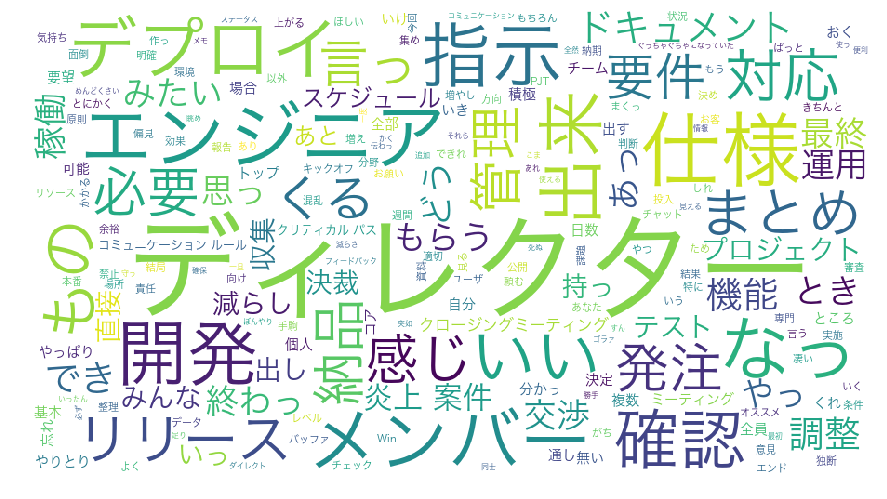

In [59]:
url = "http://qiita.com/t_saeko/items/2b475b8657c826abc114"
wordlist = get_wordlist_from_QiitaURL(url)
create_wordcloud(" ".join(wordlist))